In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I'll bring in the raw data file so that I can see what I'm working with. I'll assign it to variable df so that it can more easily managed.

In [4]:
df = pd.read_csv('/Users/jeffreyfennell/Desktop/Coding/Git/DA-Unnamed-Project/Practice_Data_Clean/Data/Louisville_Metro_KY_-_Crime_Data_2021.csv', low_memory=False)

Let's see what columns we're dealing with here.

In [5]:
df.head()

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,BADGE_ID,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE,ObjectId
0,80-20-077625,2021/01/01 04:10:00,2020/12/31 20:00:00,8403,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,290,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,4100 BLOCK ST FRANCIS LN ...,LOUISVILLE,40218.0,1
1,80-20-077625,2021/01/01 04:10:00,2020/12/31 20:00:00,8403,BURGLARY,BURGLARY - 2ND DEGREE,220,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,4100 BLOCK ST FRANCIS LN ...,LOUISVILLE,40218.0,2
2,80-21-000003,2021/01/01 00:03:00,2021/01/01 00:03:00,7939,ASSAULT,ASSAULT - 1ST DEGREE,13A,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,600 BLOCK S 18TH ST ...,LOUISVILLE,40203.0,3
3,80-21-000005,2021/01/01 00:14:00,2021/01/01 00:13:00,5293,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,13A,PART I,COMPLETED,3RD DIVISION,323,RESIDENCE / HOME,800 BLOCK CANDLEGLOW CT ...,LOUISVILLE,40214.0,4
4,80-21-000006,2021/01/01 00:03:00,2020/12/31 23:03:00,5258,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,290,PART II,COMPLETED,4TH DIVISION,424,DEPARTMENT / DISCOUNT STORE,3200 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215.0,5


Collect all unneccesary colums into a variable.

In [9]:
dropped_columns = ['INCIDENT_NUMBER', 'BADGE_ID', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'ObjectId', 'LMPD_BEAT', 'BLOCK_ADDRESS', 'City', 'DATE_REPORTED']

For the purposes of my analysis, I'm going to discard any columns that have no discernible effect on the data to be analyzed. To avoid overriting the original data set, I'm going to create a new variable, ndf, to hold the data frame without the useless columns. Using the dropped_columns variable, I'll neatly drop the columns I don't need and assign that to a new variable.

In [29]:
ndf = df.drop(columns= dropped_columns)


Here, I'm calling the .head function again in order to make sure that the previous function call executed correctly.

In [30]:
ndf.head()

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218.0
1,2020/12/31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218.0
2,2021/01/01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203.0
3,2021/01/01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214.0
4,2020/12/31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215.0


Next, I'm going to utilize the info function to see the Dtypes of all of my data columns. 

In [31]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_OCCURED   72123 non-null  object 
 1   CRIME_TYPE     72123 non-null  object 
 2   UOR_DESC       72123 non-null  object 
 3   LMPD_DIVISION  72123 non-null  object 
 4   PREMISE_TYPE   72114 non-null  object 
 5   ZIP_CODE       72098 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.3+ MB


I can see that most of the columns are currently typed as objects. However, I know from earlier that some of these columns have a more appropriate type that can be associated with them. First, I'll attempt to re-type the 'ZIP_CODE' as an OBJECT because zip codes are acting as an identifier.

In [13]:
ndf['ZIP_CODE'] = ndf['ZIP_CODE'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

We've got an error here stating the column can't be converted due to an IntCastingNaNError. To fix this, I'll fill all of the NA values in as 0.

In [32]:

ndf['ZIP_CODE'] = ndf['ZIP_CODE'].fillna(0)

Now, let's attempt to convert this column to int again.

In [33]:

ndf['ZIP_CODE'] = ndf['ZIP_CODE'].astype(int)
ndf['ZIP_CODE'] = ndf['ZIP_CODE'].astype(str)

The notebook is not giving an error now, but let's check to be sure. By running the info function, we can see that our conversion successfully executed. Additionally, by running the head function again I can see that the 'ZIP_CODE' column has dropped the decimal points from the the zip codes.

In [34]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_OCCURED   72123 non-null  object
 1   CRIME_TYPE     72123 non-null  object
 2   UOR_DESC       72123 non-null  object
 3   LMPD_DIVISION  72123 non-null  object
 4   PREMISE_TYPE   72114 non-null  object
 5   ZIP_CODE       72123 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [35]:
ndf.head()

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
1,2020/12/31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
2,2021/01/01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2021/01/01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214
4,2020/12/31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215


I used two different conversions two easily remove the floating points and subsequently changing the column to an object. It's a lazy way of doing this. There are more technical, and efficient, ways to go about getting this result.

Let's do some more conversions. The time-related column should obviously be listed per the data type it is conveying. By using pandas built in tools, I can convert that column to datetime64 Dtype. As above, I'm calling the info and head functions to check my work.

In [36]:
ndf['DATE_OCCURED'] = pd.to_datetime(ndf['DATE_OCCURED'])
ndf.info()
ndf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE_OCCURED   72123 non-null  datetime64[ns]
 1   CRIME_TYPE     72123 non-null  object        
 2   UOR_DESC       72123 non-null  object        
 3   LMPD_DIVISION  72123 non-null  object        
 4   PREMISE_TYPE   72114 non-null  object        
 5   ZIP_CODE       72123 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.3+ MB


,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020-12-31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
1,2020-12-31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
2,2021-01-01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2021-01-01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214
4,2020-12-31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215


Now, the data frame looks a lot better. I'm going to go ahead and save it to a new csv file.

In [22]:
# ndf.to_csv('Clean_Louisville_Metro_KY_-_Crime_Data_2021.csv')

Use .groupby to sort data into manageable chunks.

In [44]:
# ndf.set_index('ZIP_CODE', inplace=True)
pd.pivot_table(ndf.reset_index(),
               index='ZIP_CODE', columns= [ndf('CRIME_TYPE').count()], values='CRIME_TYPE'
              ).plot(subplots=True)

TypeError: 'DataFrame' object is not callable

In [42]:
ndf.groupby(['CRIME_TYPE', 'ZIP_CODE'])[['CRIME_TYPE']].count()


CRIME_TYPE
CRIME_TYPE ZIP_CODE            
ARSON      0                  1
           40059              4
           40202              3
           40203             21
           40204              3
...                         ...
WEAPONS    40245              7
           40258             32
           40272             38
           40291              6
           40299              6

[532 rows x 1 columns]

In [43]:
ndf.CRIME_TYPE.value_counts()

ASSAULT                     17069
THEFT/LARCENY               10828
OTHER                       10230
VEHICLE BREAK-IN/THEFT       6294
VANDALISM                    6021
DRUGS/ALCOHOL VIOLATIONS     5142
FRAUD                        4342
MOTOR VEHICLE THEFT          4336
BURGLARY                     4274
ROBBERY                      1312
WEAPONS                      1017
SEX CRIMES                    545
DISTURBING THE PEACE          337
HOMICIDE                      196
ARSON                         180
Name: CRIME_TYPE, dtype: int64

With our newly cleaned data, let's start deriving some initial insights from it. Let's simple and...

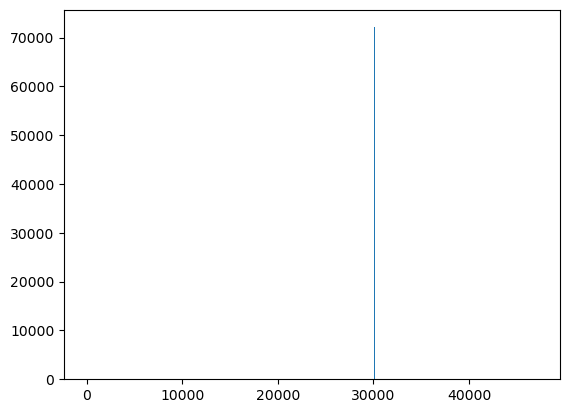

IndexError: index 10 is out of bounds for axis 0 with size 7

In [44]:
plt.bar(ndf['ZIP_CODE'], len(ndf['CRIME_TYPE']))
plt.show()
ndf.plot(kind = 'bar', x = 'ZIP_CODE', y = [len("CRIME_TYPE")])
